<a href="https://colab.research.google.com/github/dunkelweizen/DS-Unit-2-Applied-Modeling/blob/master/Copy_of_assignment_applied_modeling_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# -*- coding: utf-8 -*-
"""
Created on Wed Dec  4 21:11:16 2019

@author: caino
"""
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

In [3]:
#%%explore and clean data


df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/thanksgiving-2015/thanksgiving-2015-poll-data.csv')



df.columns = ['ID', 'Celebrate', 'Main_Dish', 'Main_Dish_Other', 'Main_Dish_Cooked', 'Main_Dish_Cooked_Other', 'Stuffing',
              'Stuffing_Other', 'Cranberry_Sauce', 'Cranberry_Sauce_Other', 'Gravy', 'Brussel_Sprouts', 'Carrots', 'Cauliflower',
              'Corn', 'Cornbread', 'Fruit_Salad', 'Green_Beans', 'Mac_and_Cheese', 'Mashed_Potatoes', 'Rolls_Biscuits', 'Squash',
              'Salad', 'Sweet_Potatoes', 'Side_Dish_Other1', 'Side_Dish_Other2', 'Apple_Pie', 'Buttermilk_Pie', 'Cherry_Pie', 
              'Chocolate_Pie', 'Coconut_Cream_Pie', 'Key_Lime_Pie', 'Peach_Pie', 'Pecan_Pie', 'Pumpkin_Pie', 'Sweet_Potato_Pie', 
              'No_Pie', 'Other_Pie1', 'Other_Pie2', 'Apple_Cobbler', 'Blondies', 'Brownies', 'Carrot_Cake', 'Cheesecake', 'Cookies',
              'Fudge', 'Ice_Cream', 'Peach_Cobbler', 'No_Dessert', 'Other_Dessert1', 'Other_Dessert2', 'Prayer', 'Travel_Distance', 'Parade',
              'Kids_Table_Age', 'Old_Friends', 'Friendsgiving', 'Black_Friday_Shopper', 'Retail_Worker', 'Black_Friday_Worker', 'Neighborhood_Type',
              'Age', 'Gender', 'Household_Earnings', 'US_Region']

In [4]:
df.head()

,ID,Celebrate,Main_Dish,Main_Dish_Other,Main_Dish_Cooked,Main_Dish_Cooked_Other,Stuffing,Stuffing_Other,Cranberry_Sauce,Cranberry_Sauce_Other,...,Old_Friends,Friendsgiving,Black_Friday_Shopper,Retail_Worker,Black_Friday_Worker,Neighborhood_Type,Age,Gender,Household_Earnings,US_Region
0,4337954960,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,None,NaN,...,Yes,No,No,No,NaN,Suburban,18 - 29,Male,"$75,000 to $99,999",Middle Atlantic
1,4337951949,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Other (please specify),Homemade cranberry gelatin ring,...,No,No,Yes,No,NaN,Rural,18 - 29,Female,"$50,000 to $74,999",East South Central
2,4337935621,Yes,Turkey,NaN,Roasted,NaN,Rice-based,NaN,Homemade,NaN,...,Yes,Yes,Yes,No,NaN,Suburban,18 - 29,Male,"$0 to $9,999",Mountain
3,4337933040,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Homemade,NaN,...,Yes,No,No,No,NaN,Urban,30 - 44,Male,"$200,000 and up",Pacific
4,4337931983,Yes,Tofurkey,NaN,Baked,NaN,Bread-based,NaN,Canned,NaN,...,Yes,No,No,No,NaN,Urban,30 - 44,Male,"$100,000 to $124,999",Pacific


In [5]:
import re #this is your regex library

In [6]:
df['Brussel_Sprouts'].iloc[1]

nan

In [7]:
df['Brussel_Sprouts'].head()

0                NaN
1                NaN
2    Brussel sprouts
3    Brussel sprouts
4    Brussel sprouts
Name: Brussel_Sprouts, dtype: object

In [8]:
side_dishes = ['Stuffing',
              'Stuffing_Other', 'Cranberry_Sauce', 'Cranberry_Sauce_Other', 'Gravy', 'Brussel_Sprouts', 'Carrots', 'Cauliflower',
              'Corn', 'Cornbread', 'Fruit_Salad', 'Green_Beans', 'Mac_and_Cheese', 'Mashed_Potatoes', 'Rolls_Biscuits', 'Squash',
              'Salad', 'Sweet_Potatoes', 'Side_Dish_Other1', 'Side_Dish_Other2', 'Apple_Pie', 'Buttermilk_Pie', 'Cherry_Pie', 
              'Chocolate_Pie', 'Coconut_Cream_Pie', 'Key_Lime_Pie', 'Peach_Pie', 'Pecan_Pie', 'Pumpkin_Pie', 'Sweet_Potato_Pie', 
              'No_Pie', 'Other_Pie1', 'Other_Pie2', 'Apple_Cobbler', 'Blondies', 'Brownies', 'Carrot_Cake', 'Cheesecake', 'Cookies',
              'Fudge', 'Ice_Cream', 'Peach_Cobbler', 'No_Dessert', 'Other_Dessert1', 'Other_Dessert2']

vegetables = ['Brussel_Sprouts', 'Carrots', 'Cauliflower', 'Corn', 'Green_Beans',
              'Squash', 'Salad']
starches = ['Stuffing', 'Cornbread', 'Mac_and_Cheese', 'Mashed_Potatoes', 'Rolls_Biscuits',
            'Sweet_Potatoes']
sweet_sides = ['Cranberry_Sauce', 'Fruit_Salad']
desserts = ['Apple_Pie', 'Buttermilk_Pie', 'Cherry_Pie', 
              'Chocolate_Pie', 'Coconut_Cream_Pie', 'Key_Lime_Pie', 'Peach_Pie', 
               'Pecan_Pie', 'Pumpkin_Pie', 'Sweet_Potato_Pie',
            'Apple_Cobbler', 
               'Blondies', 'Brownies', 'Carrot_Cake', 'Cheesecake', 'Cookies',
              'Fudge', 'Ice_Cream', 'Peach_Cobbler']
pies = ['Apple_Pie', 'Buttermilk_Pie', 'Cherry_Pie', 
              'Chocolate_Pie', 'Coconut_Cream_Pie', 'Key_Lime_Pie', 'Peach_Pie', 
               'Pecan_Pie', 'Pumpkin_Pie', 'Sweet_Potato_Pie']
food = ['Stuffing', 'Cranberry_Sauce', 'Gravy', 'Brussel_Sprouts', 'Carrots', 'Cauliflower',
       'Corn', 'Cornbread', 'Fruit_Salad', 'Green_Beans', 'Mac_and_Cheese',
       'Mashed_Potatoes', 'Rolls_Biscuits', 'Squash', 'Salad',
       'Sweet_Potatoes', 'Apple_Pie', 'Buttermilk_Pie', 'Cherry_Pie',
       'Chocolate_Pie', 'Coconut_Cream_Pie', 'Key_Lime_Pie', 'Peach_Pie',
       'Pecan_Pie', 'Pumpkin_Pie', 'Sweet_Potato_Pie',
       'Apple_Cobbler', 'Blondies', 'Brownies', 'Carrot_Cake', 'Cheesecake',
       'Cookies', 'Fudge', 'Ice_Cream', 'Peach_Cobbler']
number_of_sides = ['Number_Vegetables', 'Number_Desserts',
       'Number_Starches', 'Number_Pies', 'Number_Sweet_Sides', 'Number_Dishes']
food_and_number = food + number_of_sides

In [9]:
df['US_Region'].isnull().sum()

59

In [10]:
df['Main_Dish'].value_counts(normalize=True)

Turkey                    0.881930
Other (please specify)    0.035934
Ham/Pork                  0.029774
Tofurkey                  0.020534
Chicken                   0.012320
Roast beef                0.011294
I don't know              0.005133
Turducken                 0.003080
Name: Main_Dish, dtype: float64

In [11]:
df['Main_Dish_Cooked'].value_counts(normalize=True)

Baked                     0.493840
Roasted                   0.388090
Other (please specify)    0.052361
Fried                     0.048255
I don't know              0.017454
Name: Main_Dish_Cooked, dtype: float64

In [12]:
df['Cranberry_Sauce'].value_counts()

Canned                    502
Homemade                  301
None                      146
Other (please specify)     25
Name: Cranberry_Sauce, dtype: int64

In [13]:
 

#%% create data wrangling function

def wrangle(df):
    #remove rows without a region given
    df = df.dropna(subset=['US_Region'])
    #get rid of any rows where they don't celebrate
    df = df.drop(df[df.Celebrate == 'No'].index)
    df = df.drop('Celebrate', axis = 1)
    #remove earnings, is creating a map of earning potential by region rather than anything to do with food
    df = df.drop('Household_Earnings', axis=1)
    #Simplifying the regions in order to increase model accuracy
    df['US_Region'] = df['US_Region'].apply(lambda x : 'Pacific' if ((x == 'Pacific') | (x == 'Mountain')) else x)
    df['US_Region'] = df['US_Region'].apply(lambda x : 'Northeast' if ((x == 'New England') | (x == 'Middle Atlantic')) else x)
    df['US_Region'] = df['US_Region'].apply(lambda x : 'Midwest' if ((x == 'East South Central') | (x == 'East North Central')) else x)
#removing the 'Other' side dish columns for simplicities' sake
    for column in df.columns:
        if 'Other' in column:
            df = df.drop(column, axis=1)
    df['Number_Vegetables'] = df[vegetables].count(axis=1)
    df['Number_Starches'] = df[starches].count(axis=1)
    df['Number_Desserts'] = df[desserts].count(axis=1)
    df['Number_Pies'] = df[pies].count(axis=1)
    df['Number_Sweet_Sides'] = df[sweet_sides].count(axis=1)
    df['Number_Dishes'] = df[food].count(axis=1)
    #data is formatted so that a column has the name of the dish if true and NaN if false
#so replace all the NaN with No and all values with Yes
#also for Parade column
    for column in df.columns:
        if (column in side_dishes) & (column != 'Cranberry_Sauce'):
            df[column] = df[column].replace(r'.*', 'Yes', regex=True)
            df[column] = df[column].fillna('No')
        elif column == 'Cranberry_Sauce':
            df[column] = df[column].fillna('None')
        elif column == 'Parade':
            df[column] = df[column].replace(r'.*', 'Yes', regex=True)
            df[column] = df[column].fillna('No')
    df = df.replace('YesYes', 'Yes')
#simplify main dish options
    main_dishes = ('Turkey', 'Ham/Pork', 'Tofurkey', 'Chicken')
    df['Main_Dish'] = df['Main_Dish'].apply(lambda x : x if x in main_dishes else 'Other')
    cook_options = ('Baked', 'Roasted', 'Fried')
    df['Main_Dish_Cooked'] = df['Main_Dish_Cooked'].apply(lambda x : x if x in cook_options else 'Other')
#remove the ID column, it's meaningless
    df = df.drop('ID', axis=1)
#replace empty values in Black_Friday_Worker with 'No' if person isn't in retail
    for i in range(len(df)):
        if df['Retail_Worker'].iloc[i] == 'No':
            df['Black_Friday_Worker'].iloc[i] = 'No'

#fix NaN values in other columns
    df['Kids_Table_Age'] = df['Kids_Table_Age'].fillna('No Kids Table')
    mode = df['Age'].mode()[0]
    df['Age'] = df['Age'].fillna(mode)
    mode = df['Travel_Distance'].mode()[0]
    df['Travel_Distance'] = df['Travel_Distance'].fillna(mode)
    df = df.fillna('Other')
    
    df['Kids_Table'] = df['Kids_Table_Age'].apply(lambda x: 'No' if x == 'No Kids Table' else 'Yes')
    return df

In [14]:

#%% creating X and y
def X_y_dataframes(train, test, target):
    X_train = train.drop(target, axis=1)
    X_test = test.drop(target, axis=1)
    y_train = train[target]
    y_test = test[target]
    #ordinal encoding
    encoder = OrdinalEncoder()
    X_train_encoded = encoder.fit_transform(X_train)
    X_test_encoded = encoder.fit_transform(X_test)
    #converting encoded arrays back to dataframes
    X_train_encoded = pd.DataFrame(X_train_encoded)
    X_train_encoded.columns = X_train.columns
    X_test_encoded = pd.DataFrame(X_test_encoded)
    X_test_encoded.columns = X_test.columns
    return X_train_encoded, X_test_encoded, y_train, y_test

In [15]:

#%% leave one out validation
def loocv(X_train, y_train, model):
    num_folds = 10
    num_instances = len(X_train)
    loocv = LeaveOneOut()
    results = cross_val_score(model, X_train, y_train, cv=loocv)
    print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))


In [16]:
def select_features(X_train_encoded, y_train, num_features, classifier):
    rfe_selector = RFE(estimator=classifier, n_features_to_select=num_features, step=10)
    rfe_selector.fit(X_train_encoded, y_train)
    rfe_support = rfe_selector.get_support()
    rfe_feature = X_train_encoded.loc[:,rfe_support].columns.tolist()
    print(str(len(rfe_feature)), 'selected features')
    print(rfe_feature)
    return rfe_feature

In [17]:
#%%splitting data

train, test = train_test_split(df)
train = wrangle(train)
test = wrangle(test)


C:\Users\caino\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [18]:
train.head(10).T

,279,574,101,68,567,1017,1011,356,463,482
Main_Dish,Turkey,Turkey,Turkey,Turkey,Turkey,Turkey,Turkey,Turkey,Turkey,Turkey
Main_Dish_Cooked,Baked,Baked,Baked,Roasted,Baked,Baked,Baked,Baked,Baked,Roasted
Stuffing,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
Cranberry_Sauce,Canned,Canned,Homemade,Canned,Canned,Homemade,Homemade,Canned,Canned,Canned
Gravy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
Brussel_Sprouts,No,No,No,No,No,No,No,No,Yes,No
Carrots,Yes,No,No,No,Yes,No,No,Yes,Yes,No
Cauliflower,No,No,No,No,No,No,No,No,No,No
Corn,Yes,No,Yes,No,No,No,Yes,Yes,Yes,No
Cornbread,No,No,No,No,No,Yes,Yes,Yes,No,No


In [19]:
#%%
target = 'US_Region'

In [20]:
X_train_encoded, X_test_encoded, y_train, y_test = X_y_dataframes(train, test, target)

In [21]:
#%%Baseline model
print(y_train.value_counts(normalize=True))
baseline = 'South Atlantic'

South Atlantic        0.225714
Northeast             0.215714
Midwest               0.200000
Pacific               0.191429
West South Central    0.090000
West North Central    0.077143
Name: US_Region, dtype: float64


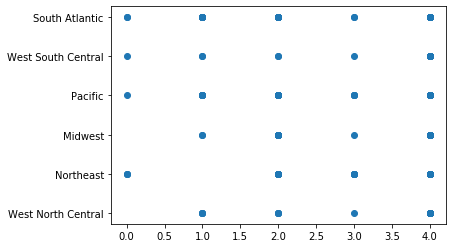

In [22]:
import matplotlib.pyplot as plt
plt.scatter(x=X_train_encoded['Main_Dish'], y=y_train)
plt.show();

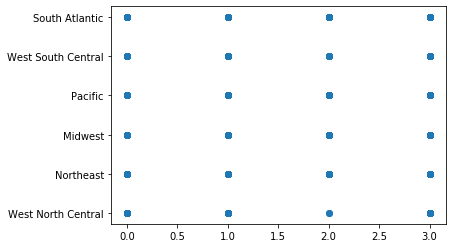

In [23]:
plt.scatter(x=X_train_encoded['Travel_Distance'], y=y_train)
plt.show();

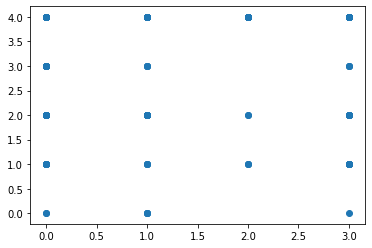

In [24]:
plt.scatter(x=X_train_encoded['Travel_Distance'], y=X_train_encoded['Main_Dish'])
plt.show();

In [ ]:
#Logistic Regression Model

model = LogisticRegression(max_iter = 10000, multi_class='auto', n_jobs=-1)
model.fit(X_train_encoded, y_train)
loocv(X_train_encoded, y_train, model)


In [28]:
import eli5
from eli5.sklearn import PermutationImportance


perm = PermutationImportance(model).fit(X_train_encoded, y_train)
eli5.show_weights(perm)

Weight,Feature
0.0509 ± 0.0187,x56
0.0331 ± 0.0127,x12
0.0243 ± 0.0123,x54
0.0163 ± 0.0106,x51
0.0157 ± 0.0153,x53
0.0157 ± 0.0126,x9
0.0151 ± 0.0179,x15
0.0134 ± 0.0059,x38
0.0134 ± 0.0059,x23
0.0131 ± 0.0163,x48


In [29]:
X_train_encoded.iloc[:,56]

0       6.0
1       8.0
2       7.0
3       6.0
4      10.0
       ... 
695     5.0
696     7.0
697     7.0
698     6.0
699     8.0
Name: Number_Dishes, Length: 700, dtype: float64

In [31]:
model = LogisticRegression(max_iter = 10000, multi_class='auto')
features = select_features(X_train_encoded, y_train, 10, model)
X_train_features = X_train_encoded[features]
model.fit(X_train_features, y_train)
loocv(X_train_encoded, y_train, model)


10 selected features
['Brussel_Sprouts', 'Mac_and_Cheese', 'Squash', 'Buttermilk_Pie', 'Key_Lime_Pie', 'Peach_Pie', 'Sweet_Potato_Pie', 'Carrot_Cake', 'Peach_Cobbler', 'Black_Friday_Worker']
Accuracy: 34.286% (47.466%)


In [32]:
perm = PermutationImportance(model).fit(X_train_features, y_train)
eli5.show_weights(perm)

Weight,Feature
0.0383 ± 0.0091,x1
0.0286 ± 0.0148,x2
0.0094 ± 0.0105,x7
0.0080 ± 0.0076,x4
0.0074 ± 0.0151,x3
0.0071 ± 0.0085,x8
0.0049 ± 0.0147,x6
0.0046 ± 0.0052,x5
0.0020 ± 0.0143,x0
-0.0037 ± 0.0082,x9


In [33]:
X_train_features.iloc[:,9]

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
695    1.0
696    1.0
697    1.0
698    1.0
699    1.0
Name: Black_Friday_Worker, Length: 700, dtype: float64

In [34]:
X_train_features = X_train_features.drop('Black_Friday_Worker', axis=1)

In [35]:
model.fit(X_train_features, y_train)
loocv(X_train_encoded, y_train, model)

Accuracy: 34.286% (47.466%)


In [36]:
perm = PermutationImportance(model).fit(X_train_features, y_train)
eli5.show_weights(perm)

Weight,Feature
0.0406 ± 0.0103,x1
0.0354 ± 0.0100,x2
0.0160 ± 0.0049,x7
0.0143 ± 0.0051,x8
0.0077 ± 0.0121,x3
0.0071 ± 0.0057,x6
0.0060 ± 0.0080,x4
0.0057 ± 0.0048,x5
0.0046 ± 0.0091,x0


In [37]:
X_train_features.head()

,Brussel_Sprouts,Mac_and_Cheese,Squash,Buttermilk_Pie,Key_Lime_Pie,Peach_Pie,Sweet_Potato_Pie,Carrot_Cake,Peach_Cobbler
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
print(features)

['Brussel_Sprouts', 'Mac_and_Cheese', 'Squash', 'Buttermilk_Pie', 'Key_Lime_Pie', 'Peach_Pie', 'Sweet_Potato_Pie', 'Carrot_Cake', 'Peach_Cobbler', 'Black_Friday_Worker']


In [ ]:
best_log_features = ['Brussel_Sprouts', 'Mac_and_Cheese', 'Squash', 'Buttermilk_Pie', 'Key_Lime_Pie', 'Peach_Pie', 'Sweet_Potato_Pie', 'Carrot_Cake', 'Peach_Cobbler', 'Black_Friday_Worker']

In [1]:
#Random Forest Model

classifier = RandomForestClassifier(n_estimators=100)
features = select_features(X_train_encoded, y_train, 10, classifier)
X_train_encoded_new = X_train_encoded[features]
classifier.fit(X_train_encoded_new, y_train)
loocv(X_train_encoded_new, y_train, classifier)
#22.2% accurate


NameError: name 'RandomForestClassifier' is not defined

Randomized Search for hyperparameters

In [26]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(results['mean_test_score'][candidate], results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [27]:
# specify parameters and distributions to sample from
param_dist = {'max_depth': range(10, 50, 2),
              'min_samples_leaf': [1,2,3,4,5],'min_samples_split': [2, 3, 4, 5],
              'n_estimators': range(100, 500, 10),
              "criterion": ["gini", "entropy"]}

n_iter_search = 25
random_search = RandomizedSearchCV(classifier, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, iid=False, n_jobs=-1)

random_search.fit(X_train_encoded, y_train)

report(random_search.cv_results_)

NameError: name 'clf' is not defined

In [ ]:
#Grid Search for hyperparameters

param_grid = {"max_depth": range(30, 50, 5),
              "n_estimators": range(100, 500, 10),
              "min_samples_leaf": range(2, 5)
              }

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=3, iid=False, n_jobs=-1)
grid_search.fit(X_train_encoded, y_train)
report(grid_search.cv_results_)

In [28]:
#updated forest model 
classifier = RandomForestClassifier(n_estimators=250, min_samples_split = 4, min_samples_leaf=4, max_depth=35,
                                    criterion='gini')
features = select_features(X_train_encoded, y_train, 10, classifier)
X_train_encoded_new = X_train_encoded[features]
classifier.fit(X_train_encoded_new, y_train)
loocv(X_train_encoded_new, y_train, classifier)


10 selected features
['Main_Dish_Cooked', 'Cranberry_Sauce', 'Travel_Distance', 'Kids_Table_Age', 'Neighborhood_Type', 'Age', 'Number_Vegetables', 'Number_Starches', 'Number_Desserts', 'Number_Dishes']
Accuracy: 24.133% (42.789%)


In [29]:
import xgboost
model = xgboost.XGBClassifier(n_jobs=-1)
#features = select_features(X_train_encoded, y_train, 15, model)
features = ['Brussel_Sprouts', 'Cornbread', 'Fruit_Salad', 'Mac_and_Cheese', 'Mashed_Potatoes', 'Rolls_Biscuits', 'Squash', 'Salad', 'Apple_Pie', 'Buttermilk_Pie', 'Pecan_Pie', 'Ice_Cream', 'No_Dessert', 'Friendsgiving', 'Black_Friday_Shopper']

In [30]:
X_train_encoded_new = X_train_encoded[features]
model.fit(X_train_encoded_new, y_train)

#hang onto this, best model so far (35.2% accuracy)

loocv(X_train_encoded_new, y_train, model)

Accuracy: 32.948% (47.002%)


In [ ]:
from sklearn.pipeline import make_pipeline

X_train = train.drop(target, axis=1)
y_train = train[target]


pipeline = make_pipeline(OrdinalEncoder(),
                        xgboost.XGBClassifier(n_jobs=-1))

pipeline.fit(X_train, y_train)

loocv(X_train, y_train, pipeline)

In [ ]:
pipeline = make_pipeline(OrdinalEncoder(),
                        RandomForestClassifier(n_estimators=100, n_jobs=-1))

pipeline.fit(X_train, y_train)

loocv(X_train, y_train, pipeline)

In [ ]:
X_train_features = X_train[features]

pipeline.fit(X_train_features, y_train)
loocv(X_train_features, y_train, pipeline)

In [ ]:
param_dist = {'max_depth': range(10, 50, 2),
              'min_samples_leaf': [1,2,3,4,5],'min_samples_split': [2, 3, 4, 5],
              'n_estimators': range(100, 500, 10),
              "criterion": ["gini", "entropy"]}

n_iter_search = 25
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, iid=False, n_jobs=-1)

random_search.fit(X_train_features, y_train)

report(random_search.cv_results_)

In [ ]:
print(y_train.iloc[[10]])

model.predict(X_train_encoded_new.iloc[[10]])

In [ ]:
import shap


row = X_train_encoded_new.iloc[[10]]
explainer=shap.TreeExplainer(model)
shap_values = explainer.shap_values(row)

shap.initjs()

shap.force_plot(
    base_value=explainer.expected_value[3],
    shap_values=shap_values[3],
    features=row,
    link='logit'
)

So the shapley plot shows me that my model said it should have been Class 3 with 85% probability

In [ ]:
print(y_train.iloc[[30]])

model.predict(X_train_encoded_new.iloc[[30]])

In [ ]:
row = X_train_encoded_new.iloc[[30]]
explainer=shap.TreeExplainer(model)
shap_values = explainer.shap_values(row)

shap.initjs()

shap.force_plot(
    base_value=explainer.expected_value[0],
    shap_values=shap_values[0],
    features=row,
    link='logit'               
)

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
y_pred_train = model.predict(X_train_encoded_new)
print(precision_recall_fscore_support(y_train, y_pred_train, average = 'weighted'))

In [ ]:
X_train_encoded.iloc[:,9]

In [ ]:
#new features based on permutation importance

features = ['Brussel_Sprouts', 'Main_Dish', 'Cauliflower', 'Mashed_Potatoes', 'Gravy', 'Corn', 'Cornbread']

In [ ]:
model = xgboost.XGBClassifier(n_jobs=-1)
X_train_encoded_new = X_train_encoded[features]

In [ ]:
X_train_encoded_new.head()

In [ ]:
model.fit(X_train_encoded_new, y_train)


loocv(X_train_encoded_new, y_train, model)

In [ ]:
import plotly_express as px

%matplotlib inline
px.scatter(train, x='Main_Dish', y='US_Region', color='Main_Dish_Cooked');

In [ ]:
px.scatter(train, x='Kids_Table_Age', y='US_Region', color='Main_Dish')

In [ ]:
px.scatter(train, 'Main_Dish', 'US_Region', facet_col='Main_Dish_Cooked', color='Gravy')

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot

In [ ]:
feature = 'Number_Desserts'

isolated = pdp_isolate(
    model = model,
    dataset = X_train_encoded_new,
    model_features = X_train_encoded_new.columns,
    feature = feature
)

In [ ]:
import seaborn as sns
sns.set()

pdp_plot(isolated, feature_name=feature)

In [ ]:
pdp_plot(isolated, feature_name=feature, plot_lines=True, frac_to_plot=100)

In [ ]:
#creates pdp plot for each isolated item

for item in isolated:
    grid = item.feature_grids
    pdp = item.pdp
    lines = item.ice_lines.sample(100).T
    plt.plot(grid, pdp)
    plt.show()

In [ ]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot
#creates plot that shows interaction between two features
features=['Number_Desserts','Kids_Table_Age']

interaction = pdp_interact(
    model=model,
    dataset=X_train_encoded_new,
    model_features=X_train_encoded_new.columns,
    features=features
)

In [ ]:
pdp_interact_plot(interaction, plot_type='grid', feature_names=features)

In [ ]:
for item in interaction: 
    pdp = item.pdp.pivot_table(
        values='preds',
        columns=features[0],
        index=features[1]
)
plt.figure(figsize=(10,6))
sns.heatmap(pdp, fmt=0)

In [ ]:
gb = model = xgboost.XGBClassifier(n_jobs=-1)
gb.fit(X_train_encoded, y_train)

In [ ]:
import matplotlib.pyplot as plt
from pdpbox import pdp

pdp_dist = pdp.pdp_isolate(model=gb, dataset=X_train_encoded, 
                           model_features=X_train_encoded.columns, feature='Main_Dish')
pdp.pdp_plot(pdp_dist, 'Main_Dish');

In [ ]:
import category_encoders as ce

X_train = train.drop('US_Region', axis=1)

encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)

In [ ]:
encoder.mapping

In [ ]:
for plot in pdp.pdp_plot(pdp_dist, 'Main_Dish'):
    plt.xticks([1,2,3,4,5], ['Turkey', 'Chicken', 'Tofurkey', 'Ham/Pork','Other'])
plt.savefig('PDP_plot.png')

In [ ]:
X_train_food = X_train_encoded[food_and_number]

In [ ]:
X_train_food.head()

In [ ]:
model = xgboost.XGBClassifier(n_jobs=-1)
model.fit(X_train_food, y_train)


loocv(X_train_food, y_train, model)



In [ ]:
perm = PermutationImportance(model).fit(X_train_food, y_train)
eli5.show_weights(perm)

In [ ]:
X_train_food.iloc[:,37]

In [ ]:
X_train_food.iloc[:,36]

In [ ]:
X_train_food.iloc[:,14]

In [ ]:
len(food)

So I could use a 36 question quiz about the foods they had, engineer the number features, and try to predict where in the country they had Thanksgiving dinner based on that and be about 30% accurate

In [ ]:
row = X_train_food.iloc[[10]]

In [ ]:
model.predict(row)

In [ ]:
y_train.iloc[[10]]

can I predict whether someone will have Turkey, Ham, or something else based on other items?

In [ ]:
train['Main_Dish'].unique()
train['Main_Dish'].value_counts(normalize=True)


In [ ]:
target = 'Main_Dish'
X_train_encoded, X_test_encoded, y_train, y_test = X_y_dataframes(train, test, target)

In [ ]:
classifier = RandomForestClassifier(n_estimators=100)
features = select_features(X_train_encoded, y_train, 10)
X_train_encoded = X_train_encoded[features]
classifier.fit(X_train_encoded, y_train)
loocv(X_train_encoded, y_train, classifier)

In [ ]:
target = 'Main_Dish'
X_train_encoded, X_test_encoded, y_train, y_test = X_y_dataframes(train, test, target)
    

In [ ]:
#use only food columns for model
X_train_food = X_train_encoded[food_and_number]

In [ ]:
#logistic model
model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter = 10000)
model.fit(X_train_food, y_train)
loocv(X_train_food, y_train, model)

In [ ]:
#Random Forest model
classifier = RandomForestClassifier(n_estimators=480, max_depth=45, min_samples_leaf=3)
features = select_features(X_train_food, y_train, 15)
X_train_encoded = X_train_food[features]
classifier.fit(X_train_food, y_train)
loocv(X_train_food, y_train, classifier)

In [ ]:

y_pred_train = classifier.predict(X_train_food)
print(precision_recall_fscore_support(y_train, y_pred_train, average = 'weighted'))

In [ ]:
model = xgboost.XGBClassifier(n_jobs=-1)
model.fit(X_train_encoded, y_train)


loocv(X_train_encoded, y_train, model)